<a href="https://colab.research.google.com/github/auriellalala/ComputerVision2025/blob/main/M2_Image%20Segmentation/Exercise%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: IMAGE SEGMENTATION

# Exercise 2

**Before starting:**

- Create a GitHub repository to upload the solution of this exercise.
- Share this GitHub link to your professor.

**Objectives**

Generate a single Python notebook implementing and answering the following questions:

🔹 **Task 1:** Load an image and apply a thresholding method. Analyze and discuss the segmentation results.

🔹 **Task 2:** Load an image and apply an unsupervised segmentation method (e.g., K-Means). Evaluate and comment on the outcome.

🔹 **Task 3:** Load an image and apply a supervised segmentation method (e.g., with annotated labels or using a classifier). Discuss the effectiveness and limitations.

🔹 **Task 4:** Explain the main differences between supervised and unsupervised segmentation approaches. Discuss their advantages and disadvantages, and illustrate your explanation with an example.


ANSWERS

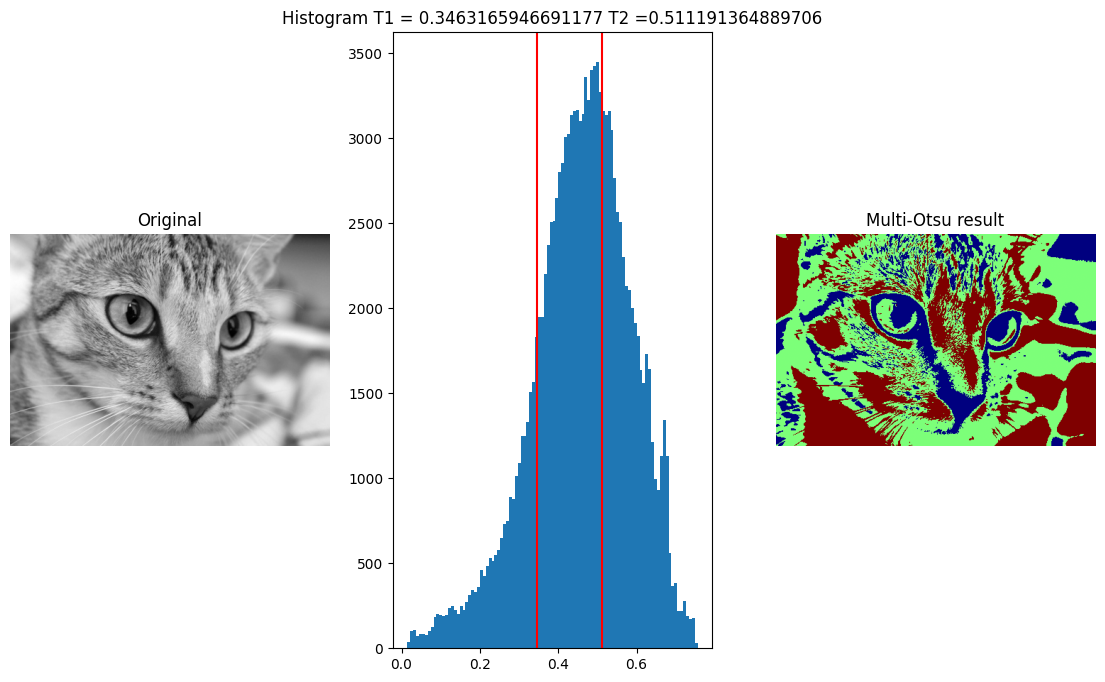

In [8]:
# Task 1
import skimage as sk # load skimage libraries
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_multiotsu
from skimage.color import rgb2gray

# Load image
IC = sk.data.cat()
IC = rgb2gray(IC)

#Apply threshold
thresholds = threshold_multiotsu(IC)

# Using the threshold values, we generate the three regions.
regions = np.digitize(IC, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 8))
flat_data = IC.flatten()

# Plotting the original image.
ax[0].imshow(IC, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(flat_data, bins=100,range=[flat_data.min(),flat_data.max()])
ax[1].set_title('Histogram T1 = {} T2 ={}'.format(thresholds[0],thresholds[1]))
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()
plt.show()

The Multi-Otsu segmentation effectively divided the grayscale image into three intensity-based regions using two thresholds. Dark areas highlight the eyes and shadows, mid-tones capture the fur details, and bright regions represent well-lit areas. This segmentation simplifies the image while preserving key features, making it useful for further image analysis or object recognition tasks.

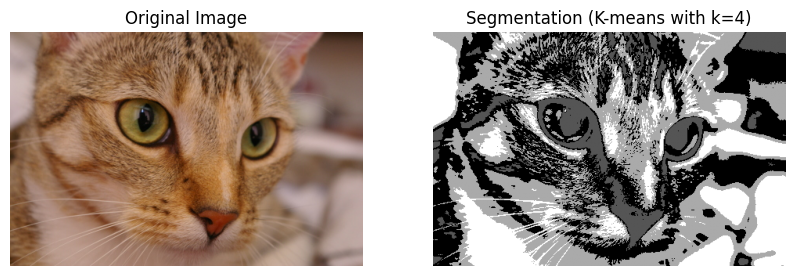

In [11]:
# Task 2
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans

# Load image and reshape
IM = sk.data.cat()
v_IM = np.reshape(IM,(IM.shape[0]*IM.shape[1],IM.shape[2]))

# Fit a Kmeans clustering model with two clusters using training image:
n_clus = 4
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_IM)

v_kmeans = kmeans.predict(v_IM)
#v_kmeans= np.logical_not(v_kmeans) # use when the pattern is associated to cluster 0 (vessels shoyld be white)
IM_kmeans = np.reshape(v_kmeans,(IM.shape[0],IM.shape[1])) # reshape back to original image size
 # Shape back result as image

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(IM, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(IM_kmeans, cmap=plt.cm.gray)
ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
ax2.set_axis_off()

plt.show()


By successfully dividing the image into four different intensity-based regions, the K-means segmentation with k=4 highlights the cat's facial features, including its eyes, nose, and fur texture. It is helpful for tasks like object detection or region-based analysis because it maintains important structural details while reducing color and texture complexity. But since it's an entirely unsupervised approach, it might only classify areas according to pixel intensity rather than semantic content.

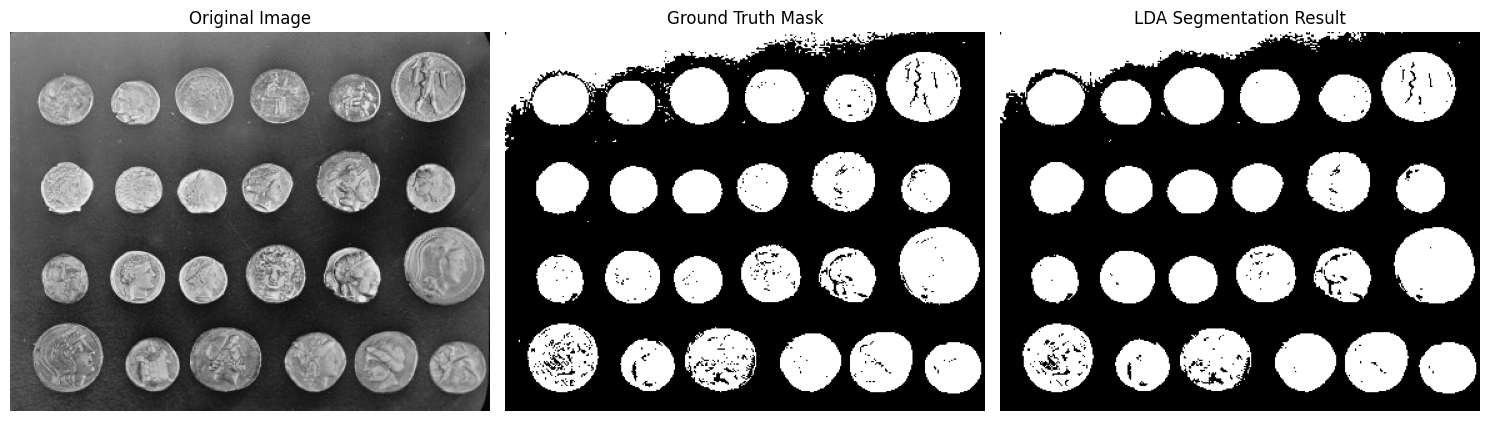

In [12]:
# Task 3
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from skimage import data, filters, feature

# Load image and reshape
IG = sk.data.coins()

#LDA
# Load grayscale image (coins) and generate ground truth using Otsu
I_train = data.coins()
thresh = filters.threshold_otsu(I_train)
I_train_GT = I_train > thresh  # binary GT: coins vs. background

# Generate simple features: intensity, local mean, edges
intensity = I_train.ravel()
local_mean = filters.gaussian(I_train, sigma=1).ravel()
edges = filters.sobel(I_train).ravel()

# Stack features into a feature matrix (each pixel = one row)
X_train = np.column_stack((intensity, local_mean, edges))
y_train = I_train_GT.ravel().astype(int)  # 0 or 1

# Fit LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict on the same image
y_pred = lda.predict(X_train)
segmentation = y_pred.reshape(I_train.shape)

# Plot results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(I_train, cmap='gray')
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(I_train_GT, cmap='gray')
axs[1].set_title("Ground Truth Mask")
axs[1].axis("off")

axs[2].imshow(segmentation, cmap='gray')
axs[2].set_title("LDA Segmentation Result")
axs[2].axis("off")

plt.tight_layout()
plt.show()

# Task 4
Difference between supervised and unsupervised segmentations: **Supervised segmentation** uses labeled data (ground truth) to train a model that learns to classify each pixel into specific categories. In contrast, **unsupervised segmentation** groups pixels based on similarity in features (like color or texture) without using any prior labels. Supervised methods generally offer higher accuracy but require annotated data, while unsupervised methods are easier to apply but may produce less precise results.
